# Working With Gridded Climate Normals
### An example highlighting the difference between Bend and Mt Bachelor in Oregon

Scott Collis scollis@anl.gov

I love the Cascades and high desert of Oregon. Not only is it a great place for recreation (hiking and riding in summer and skiing in winter) the meteorology is fascinating. In planning for a trip in February I wanted to know what the diurnal cycle and precipitation was like at Mt Bachelor and the city of Bend, where we will be staying. There are no NOAA measurements at Mt Bachelor and even nearby stations are not climate reference stations and have no normals computed. So in this notebook we use xarray to dig into the gridded climate normals from NOAA.

This simple Jupyter notebook is intended to highlight the ease and power of xarray for slicing and indexing by spatial coodinates. 

In [147]:
import xarray as xr
import cartopy.crs as ccrs
from matplotlib import pyplot as plt
from metpy.plots import USCOUNTIES

import cartopy.feature as cfeature
%matplotlib inline

bend = [44.0582, -121.3153]
bachy = [43.9898, -121.6847]
eug = [44.0521, -123.0868]


First lets learn a little about the region we are looking at. Some googling for easy to use elevation data takes me to this site: http://research.jisao.washington.edu/data_sets/elevation/

Where I grabbed the 5 minute data
http://research.jisao.washington.edu/data_sets/elevation/elev.americas.5-min.nc

In [150]:
#lets load it and convert degrees east to west and then take a slice near Oregon/Wa
ter = xr.load_dataset('/Users/scollis/Downloads/elev.americas.5-min.nc')
ter.coords['lon'] = (ter.coords['lon'] + 180) % 360 - 180
ter = ter.sortby(ter.lon)

min_lon = -125.
min_lat = 43. 
max_lon = -119. 
max_lat = 47. 


ter = ter.sel(lat=slice(max_lat, min_lat), lon=slice(min_lon, max_lon))


/Users/scollis/miniconda3/envs/crocus/lib/python3.11/site-packages/xarray/coding/times.py:150: SerializationWarning: Ambiguous reference date string: 1-1-1 0:0:0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 0:0:0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)
/Users/scollis/miniconda3/envs/crocus/lib/python3.11/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/scollis/miniconda3/envs/crocus/lib/python3.11/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime

Text(-123.0868, 44.0521, 'Eugene')

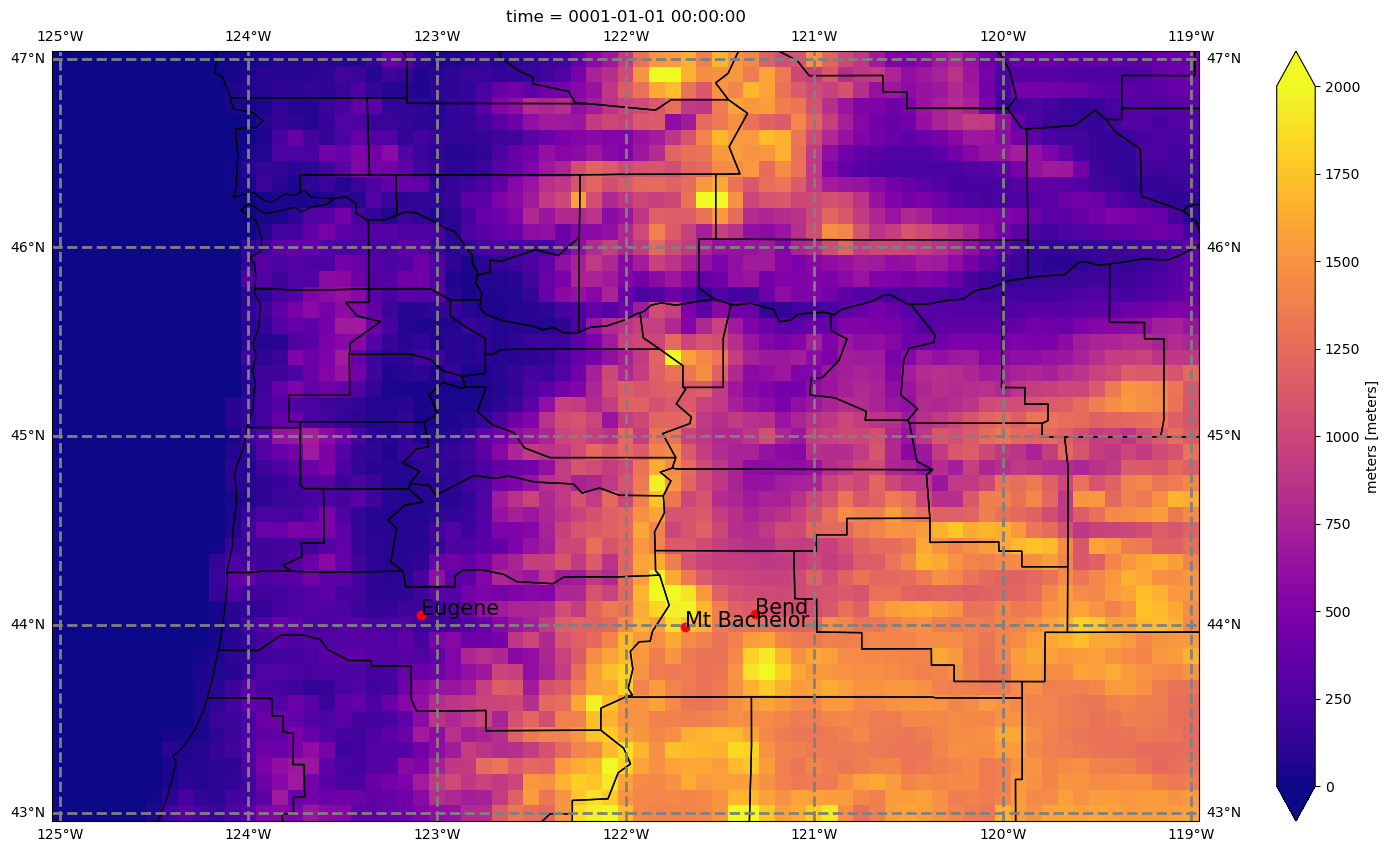

In [151]:
fm = plt.figure(figsize=[20,10])
ax = plt.axes(projection=ccrs.PlateCarree())

pc = ter.data[0].plot(vmin=0, vmax=2000, cmap='plasma')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=1, linestyle='--')


ax.add_feature(USCOUNTIES.with_scale('20m'))


plt.plot([bend[1], bachy[1], eug[1]], [bend[0], bachy[0], eug[0]], 'ro')
plt.text(bend[1], bend[0], 'Bend', size=15)
plt.text(bachy[1], bachy[0], 'Mt Bachelor', size=15)
plt.text(eug[1], eug[0], 'Eugene', size=15)



https://www.ncei.noaa.gov/products/land-based-station/us-climate-normals
Click Gridded


In [119]:
max_loc = 'https://www.nodc.noaa.gov/archive/arc0196/0245564/1.1/data/0-data/tmax-1991_2020-monthly-normals-v1.0.nc'
min_loc = 'https://www.nodc.noaa.gov/archive/arc0196/0245564/1.1/data/0-data/tmin-1991_2020-monthly-normals-v1.0.nc'
precip_loc = 'https://www.nodc.noaa.gov/archive/arc0196/0245564/1.1/data/0-data/prcp-1991_2020-monthly-normals-v1.0.nc'

In [121]:
ds_max = xr.load_dataset('/Users/scollis/Downloads/tmax-1991_2020-monthly-normals-v1.0.nc')
ds_min = xr.load_dataset('/Users/scollis/Downloads/tmin-1991_2020-monthly-normals-v1.0.nc')
ds_precip = xr.load_dataset('/Users/scollis/Downloads/prcp-1991_2020-monthly-normals-v1.0.nc')

In [110]:
ds_max

<xarray.Dataset>
Dimensions:        (lon: 1385, lat: 596, time: 12, seasons: 4)
Coordinates:
  * lon            (lon) float32 -124.7 -124.6 -124.6 ... -67.1 -67.06 -67.02
  * lat            (lat) float32 49.35 49.31 49.27 49.23 ... 24.65 24.6 24.56
  * time           (time) int32 1 2 3 4 5 6 7 8 9 10 11 12
  * seasons        (seasons) int32 1 2 3 4
Data variables: (12/15)
    mlytmax_norm   (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    mlytmax_std    (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    mlytmax_min    (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    mlytmax_max    (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    mlytmax_flag   (time, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    seastmax_norm  (seasons, lat, lon) float32 nan nan nan nan ... nan nan nan
    ...             ...
    seastmax_flag  (seasons, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    anntmax_norm   (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    anntmax_std    (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    anntmax_min    (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    anntmax_max    (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    anntmax_flag   (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes: (12/28)
    date_created:                2021-09-16 08:30:01
    date_modified:               2021-09-16 08:30:01
    Conventions:                 CF-1.6, ACDD-1.3
    ncei_template_version:       NCEI_NetCDF_Grid_Template_v2.0
    title:                       1991-2020 Normals
    naming_authority:            gov.noaa.ncei
    ...                          ...
    time_coverage_resolution:    1 month
    program:                     Center for Weather and Climate/Climate Scien...
    geospatial_lat_resolution:   0.04167 degree
    geospatial_lon_resolutioin:  0.04167 degree
    platform:                    station
    references:                  nClimGrid Monthly (Vose et al. 2014), https:...

In [111]:
ds_max.time

<xarray.DataArray 'time' (time: 12)>
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)
Coordinates:
  * time     (time) int32 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:      Time, month of the year
    standard_name:  time
    calendar:       gregorian
    units:          months
    axis:           T
    comment:        A month is defined between 1 and 12

Text(-121.6847, 43.9898, 'Mt Bachelor')

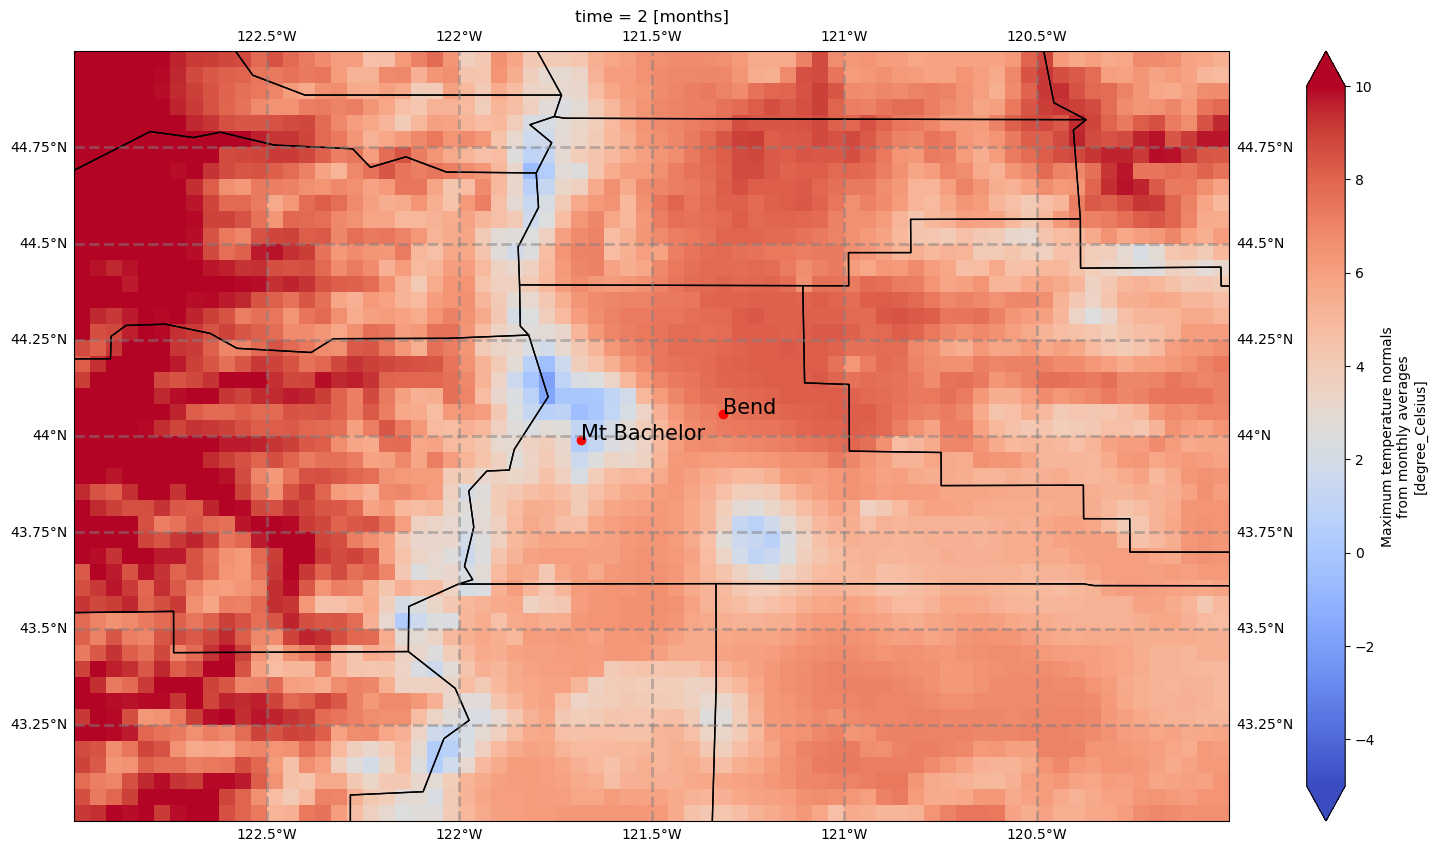

In [112]:
fm = plt.figure(figsize=[20,10])
ax = plt.axes(projection=ccrs.PlateCarree())
p = ds_max.mlytmax_norm[1].plot( transform=ccrs.PlateCarree(), ax=ax, vmin=-5, vmax=10, cmap=plt.cm.coolwarm)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

plt.ylim(43,45.)
plt.xlim(-123,-120)
ax.add_feature(USCOUNTIES.with_scale('20m'))

bend = [44.0582, -121.3153]
bachy = [43.9898, -121.6847]
plt.plot([bend[1], bachy[1]], [bend[0], bachy[0]], 'ro')
plt.text(bend[1], bend[0], 'Bend', size=15)
plt.text(bachy[1], bachy[0], 'Mt Bachelor', size=15)


Text(-121.6847, 43.9898, 'Mt Bachelor')

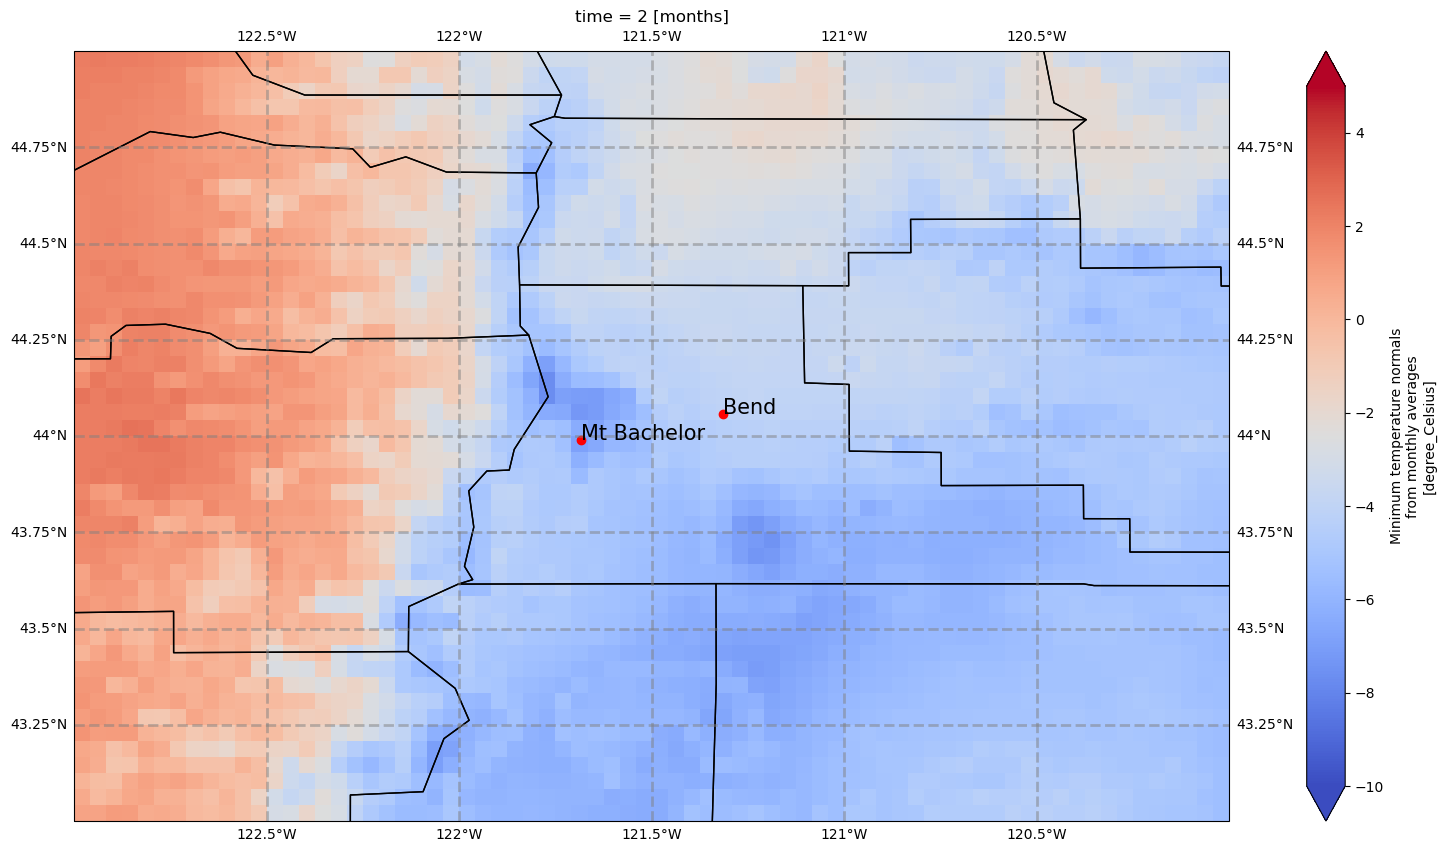

In [115]:
fm = plt.figure(figsize=[20,10])
ax = plt.axes(projection=ccrs.PlateCarree())
p = ds_min.mlytmin_norm[1].plot( transform=ccrs.PlateCarree(), ax=ax, vmin=-10, vmax=5, cmap=plt.cm.coolwarm)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

plt.ylim(43,45.)
plt.xlim(-123,-120)
ax.add_feature(USCOUNTIES.with_scale('20m'))

bend = [44.0582, -121.3153]
bachy = [43.9898, -121.6847]
plt.plot([bend[1], bachy[1]], [bend[0], bachy[0]], 'ro')
plt.text(bend[1], bend[0], 'Bend', size=15)
plt.text(bachy[1], bachy[0], 'Mt Bachelor', size=15)


Text(-121.6847, 43.9898, 'Mt Bachelor')

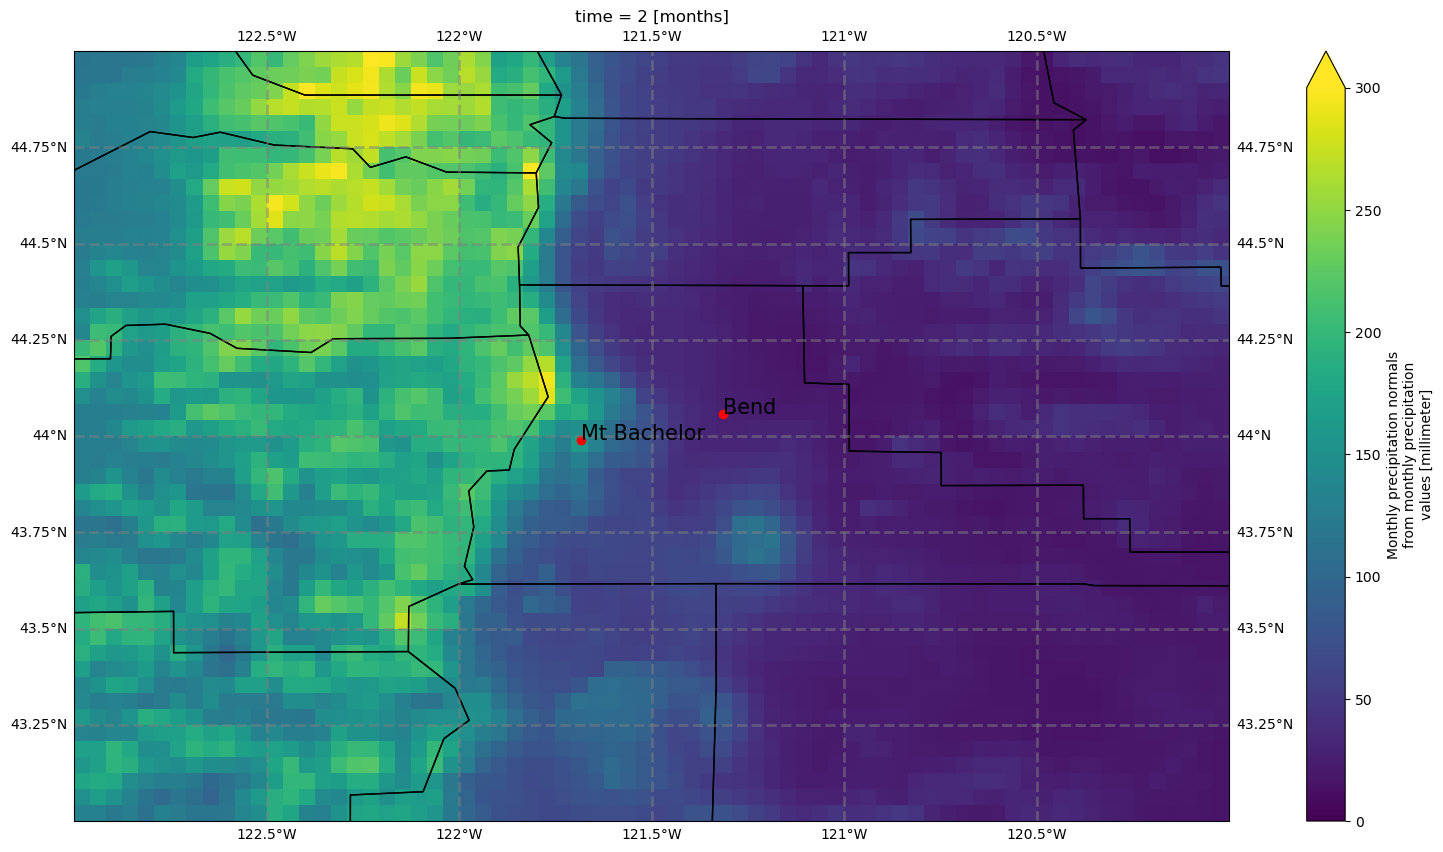

In [123]:
fm = plt.figure(figsize=[20,10])
ax = plt.axes(projection=ccrs.PlateCarree())
p = ds_precip.mlyprcp_norm[1].plot( transform=ccrs.PlateCarree(), ax=ax, cmap=plt.cm.viridis, vmin=0, vmax=300,
                                  )
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

plt.ylim(43,45.)
plt.xlim(-123,-120)
ax.add_feature(USCOUNTIES.with_scale('20m'))

bend = [44.0582, -121.3153]
bachy = [43.9898, -121.6847]
plt.plot([bend[1], bachy[1]], [bend[0], bachy[0]], 'ro')
plt.text(bend[1], bend[0], 'Bend', size=15)
plt.text(bachy[1], bachy[0], 'Mt Bachelor', size=15)


In [ ]:
lns1 = ax.plot(time, Swdown, '-', label = 'Swdown')
lns2 = ax.plot(time, Rn, '-', label = 'Rn')
ax2 = ax.twinx()
lns3 = ax2.plot(time, temp, '-r', label = 'temp')

# added these three lines
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)


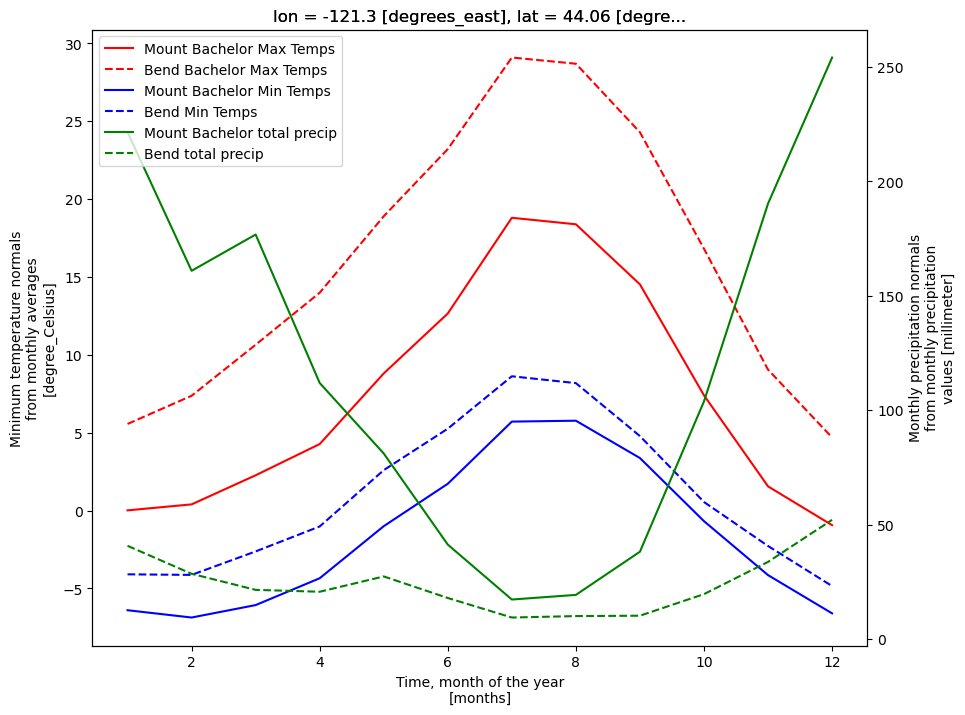

In [133]:
fm = plt.figure(figsize=[10,8])

l1 = ds_max.mlytmax_norm.sel(lat=bachy[0], lon=bachy[1], method='nearest').plot(linestyle='solid',color='r', 
                                                                           label='Mount Bachelor Max Temps')
l2 = ds_max.mlytmax_norm.sel(lat=bend[0], lon=bend[1], method='nearest').plot(linestyle='dashed',color='r', 
                                                                           label='Bend Bachelor Max Temps')
l3 = ds_min.mlytmin_norm.sel(lat=bachy[0], lon=bachy[1], method='nearest').plot(linestyle='solid',color='b', 
                                                                           label='Mount Bachelor Min Temps')
l4 = ds_min.mlytmin_norm.sel(lat=bend[0], lon=bend[1], method='nearest').plot(linestyle='dashed',color='b', 
                                                                           label='Bend Min Temps')


ax2 = plt.twinx()
l5 = ds_precip.mlyprcp_norm.sel(lat=bachy[0], lon=bachy[1], method='nearest').plot(linestyle='solid',color='g',
                                                                                  label = 'Mount Bachelor total precip')

l6 = ds_precip.mlyprcp_norm.sel(lat=bend[0], lon=bend[1], method='nearest').plot(linestyle='dashed',color='g',
                                                                                  label = 'Bend total precip')

lns = l1 + l2 + l3 + l4 + l5 + l6
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc=2)



In [101]:
#slicing example. Will do something with this one day

min_lon = -123.
min_lat = 43. 
max_lon = -120. 
max_lat = 45. 


cropped_ds = ds.mlytmax_norm.sel(lat=slice(max_lat, min_lat), lon=slice(min_lon, max_lon))
#super odd as the dimensons of the array go from high lat to low lat

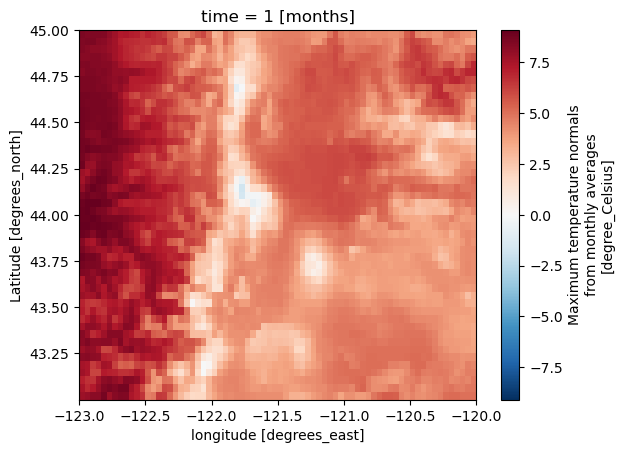

In [102]:
cropped_ds[0].plot()